<a href="https://colab.research.google.com/github/Coalbear/Neural-Networks/blob/main/Mini_NN_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_regression
seed = np.random.seed(99)
n = 100000

In [85]:
X, y = make_regression(n_samples=n, 
                       n_features=4, 
                       n_informative=3, 
                       n_targets=1, 
                       bias=19.9, 
                       effective_rank=None, 
                       tail_strength=3.5, 
                       noise=9.9, 
                       shuffle=True, 
                       coef=False, 
                       random_state=seed)

In [86]:
from sklearn.preprocessing import StandardScaler

Xscaler = StandardScaler()
yscaler = StandardScaler()

X = Xscaler.fit_transform(X)
y = np.reshape(y, (-1,1))
y = yscaler.fit_transform(y)

#Chop off a little data for the validation.
val_size = int(n/10)
X_val = X[-val_size:]
y_val = y[-val_size:]
X = X[:-val_size]
y = y[:-val_size]

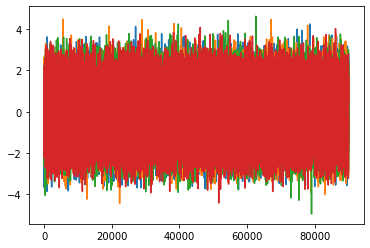

In [87]:
X = pd.DataFrame(X)
plt.plot(X.index, X.values)

In [88]:
X.head()

,0,1,2,3
0,0.313791,-0.467425,-0.243582,1.235000
1,1.026062,-1.077904,-0.297652,1.266211
2,0.263820,0.039843,-1.367125,-0.322697
3,0.089351,-0.685088,0.716109,-1.936670
4,0.989920,0.494205,-0.855772,-0.801226


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Uses tpu. Much faster training. 
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# instantiating the model in the strategy scope creates the model on the TPU
with tpu_strategy.scope():
    model = Sequential()
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.119.156.74:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.119.156.74:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Epoch 1/10
943/943 [==============================] - 16s 13ms/step - loss: 0.4698 - val_loss: 0.1539
Epoch 2/10
943/943 [==============================] - 11s 11ms/step - loss: 0.0747 - val_loss: 0.0251
Epoch 3/10
943/943 [==============================] - 11s 11ms/step - loss: 0.0148 - val_loss: 0.0109
Epoch 4/10
943/943 [==============================] - 11s 11ms/step - loss: 0.0090 - val_loss: 0.0082
Epoch 5/10
943/943 [==============================] - 10s 11ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 6/10
943/943 [==============================] - 10s 11ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 7/10
943/943 [==============================] - 11s 12ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 8/10
943/943 [==============================] - 10s 11ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 9/10
943/943 [==============================] - 10s 11ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 10/10
943/943 [==============================] - 10s 11ms/step - loss: 0.007

In [93]:
'''
Note to future self:
The loss is calculated using Mean squared error which is the average 
squared difference between the estimated values and the actual value
'''
train_mse = model.evaluate(X_train, y_train, verbose=2)
test_mse = model.evaluate(X_test, y_test, verbose=2)
print('MSE Train: %.3f, MSE Test: %.3f' % (train_mse, test_mse))

1885/1885 - 7s - loss: 0.0069
929/929 - 4s - loss: 0.0070
MSE Train: 0.007, MSE Test: 0.007


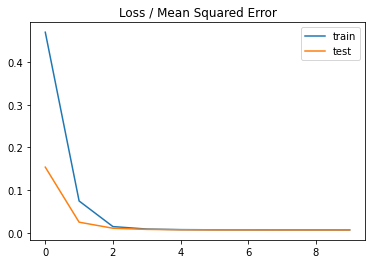

In [94]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [95]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
